# State of the Union

## Topic Modeling with *topicmodels*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
library(tidyverse)
library(tm)
library(topicmodels)

options(repr.matrix.max.rows = 10000, repr.matrix.max.cols = 10000)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
s <- SimpleCorpus(VectorSource(d$Text))

m <- DocumentTermMatrix(
    s,
    control=list(
        removePunctuation=TRUE,
        removeNumbers=TRUE,
        stopwords=TRUE,
        stemming=TRUE,
        minWOrdLength=3
    )
)

In [4]:
lda_model <- LDA(x = m, k = 7)

In [5]:
terms(lda_model, 10)

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
will,will,year,peopl,american,will,will
america,america,will,will,america,american,year
american,must,american,work,year,year,american
must,year,must,year,will,work,tax
peopl,american,america,can,applaus,job,can
nation,nation,new,american,peopl,america,must
year,world,work,must,presid,that,govern
world,can,can,govern,one,peopl,peopl
secur,let,now,new,can,new,make
countri,freedom,everi,congress,job,can,now


## Visualization

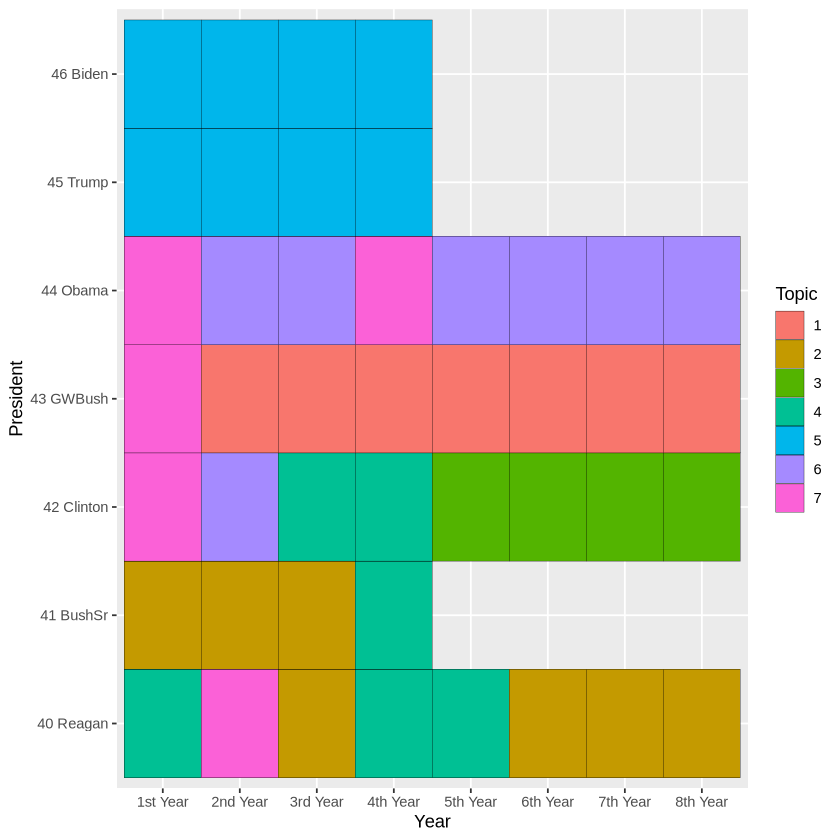

In [6]:
data.frame(President=d$President, Year=d$Year, Topic=factor(topics(lda_model))) %>%
    ggplot(aes(x=Year, y=President, fill=Topic)) +
    geom_tile(color="black")